# How many data out there? 
We will retrieve all the cells at lower resolution. Check if they have data (children) and then convert it to raster ("not take much time on this).

## Later 
In this exercise I'll perform a spatial autocorrelation model using the tools available in spystats and the data stored in *Biospytial*
In particular estimate a richness model.


In [227]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
from drivers.tree_builder import TreeNeo
from drivers.graph_models import TreeNode, Order, Family, graph
from drivers.graph_models import Cell,Mex4km, countObjectsOf
import matplotlib.pyplot as plt
## Use the ggplot style
plt.style.use('ggplot')

## Take a subsample of the Cells.

In [2]:
n = graph.data("MATCH (n:mex4km) RETURN Count(n)").pop()['Count(n)']

In [5]:
n = countObjectsOf(Mex4km)
print(n)

279277


### A lot of data we need to use a sampling method.

In [76]:
import numpy as np
sample_size = 1000
choices = np.random.choice(range(1,n),sample_size,replace='False')

### Query for exporting a selection of cells.

In [78]:
c = list(choices)
sel = Mex4km.select(graph).where("_.id IN  %s "%str(c))

In [80]:
%time samples = list(sel)

CPU times: user 1.59 s, sys: 36 ms, total: 1.63 s
Wall time: 1.83 s


In [97]:
connections_to = map(lambda s : list(s.connected_to),samples)

In [140]:
import drivers.tree_builder as tb

In [141]:
%time trees = map(lambda cell : tb.buildTreeNeo(cell),samples)

CPU times: user 1min 52s, sys: 4.4 s, total: 1min 56s
Wall time: 2min 50s


In [148]:
big_tree = reduce(lambda a,b : a+b , trees)

INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging Trees
INFO Merging

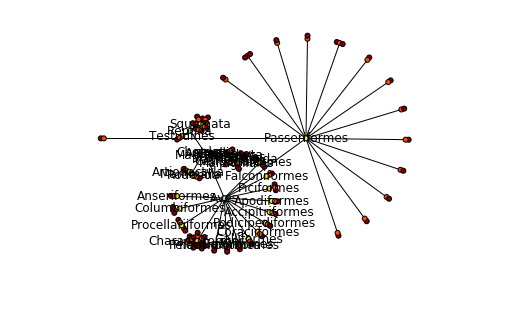

In [161]:
tl.plotTree(tt)

In [165]:
import traversals.strategies as strg

In [168]:
type(root)

drivers.tree_builder.LocalTree

In [167]:
root = t.node

In [169]:
a = strg.getPresencesForNode(root,trees)

In [191]:
data_t = strg.getPresencesForListOfNodes([root],trees)

In [192]:
data_t

,LUCA,Longitude,Latitude
0,1.0,-112.351563,29.01339
1,0.0,-103.384563,39.45039
2,0.0,-92.261563,32.05139
3,0.0,-104.805563,42.97839
4,0.0,-103.482563,38.96039
5,0.0,-85.695563,32.29639
6,0.0,-103.972563,28.08239
7,1.0,-96.034563,17.10639
8,0.0,-108.872563,37.39239
9,0.0,-90.105563,39.59739


# The model

In [189]:
import pymc3 as pm

In [194]:
-

Average Loss = inf: 100%|██████████| 10000/10000 [33:40<00:00,  4.95it/s]

CPU times: user 2h 5min 17s, sys: 8min 45s, total: 2h 14min 3s
Wall time: 33min 45s


In [195]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=model)
map_estimate

logp = -inf, ||grad|| = 124.85: 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]   


{'latent_field': array([-0.73343847, -0.38564791, -0.54570559, -0.2558003 , -0.40794993,
        -0.32238054, -1.04685204, -1.11899853, -0.46543084, -0.22570912,
        -1.02476374, -0.35236598, -0.74480258, -0.83200394, -1.21181438,
        -0.28717365, -0.22495268, -0.75777133, -0.42106569, -1.0992782 ,
        -0.20676706, -0.36665159, -0.15415031, -1.06191663, -0.55416702,
        -0.96203963, -1.25556893, -0.28448368, -0.48019132, -0.3919334 ,
        -0.93088407, -0.38568662, -0.45522156, -0.25741641, -0.16960664,
        -0.94537467, -0.23835479, -0.25710781, -0.55499546, -0.51426469,
        -0.84568294, -0.99291177, -0.95613267, -0.3082558 , -0.27413035,
        -0.32113415, -0.33161299, -0.32928146, -0.77513582, -0.19184789,
        -0.32413917, -0.50971131, -0.24267277, -1.26458785, -0.29543455,
        -0.20804991, -1.22437787, -0.31169938, -0.98219296, -0.36243088,
        -0.99844987, -0.32911662, -0.23992993, -0.16049217, -0.16933039,
        -0.58598021, -1.27451048, -

In [220]:
import pandas as pd

In [222]:
mapxy = pd.concat([data_t[['Longitude','Latitude']],pd.DataFrame({'map': map_estimate['latent_field']})],axis=1)

In [224]:
gmapxy = tools.toGeoDataFrame(mapxy,xcoord_name='Longitude',ycoord_name='Latitude')

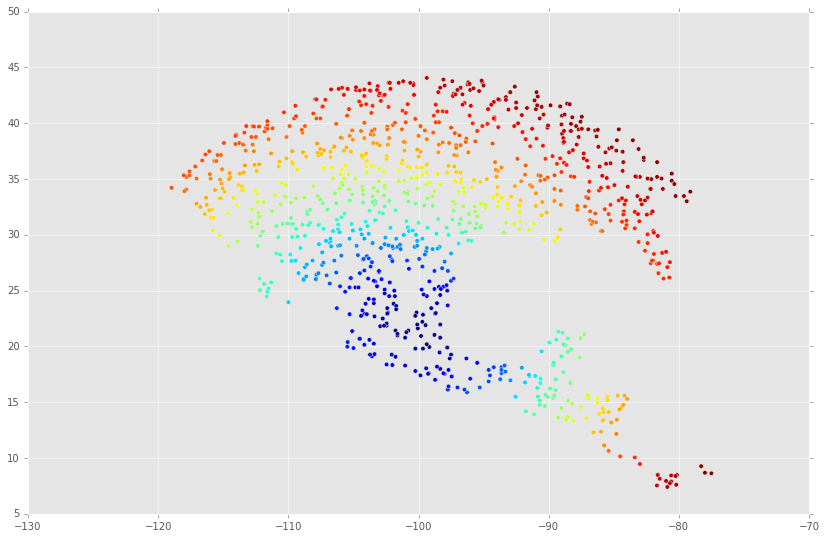

In [232]:
fig, ax = plt.subplots(figsize=(14, 9));
gmapxy.plot(ax=ax,column='map')

## Prediction
The conditional method creates the conditional, or predictive, distribution over the latent function at arbitrary x∗x∗ input points, f(x∗)f(x∗). To construct the conditional distribution we write:

In [199]:
minx = min(data_t.Longitude)
maxx = max(data_t.Longitude)
miny = min(data_t.Latitude)
maxy = max(data_t.Latitude)

In [204]:
from external_plugins.spystats.spystats import tools

In [207]:
grid = tools.createGrid(grid_sizex=10,grid_sizey=10,minx=minx,miny=miny,maxx=maxx,maxy=maxy)

TypeError: prior() takes at least 3 arguments (2 given)

In [233]:
gp.predict(grid[['Lon','Lat']])

NotImplementedError: 

In [215]:
%time f_star = gp.conditional("f_star", X=grid[['Lon','Lat']])

TypeError: conditional() takes at least 3 arguments (3 given)

In [177]:
getdata = lambda tree : tree.associatedData.getEnvironmentalVariablesCells()

In [186]:
ts[1].associatedData.getEnvironmentalVariablesCells()

ERROR Could not extract Raster data from aggregation
ERROR:biospytial.raster_api.tools:Could not extract Raster data from aggregation
Exception django.contrib.gis.gdal.error.GDALException: GDALException('Invalid pointer returned from "GDALClose"',) in ERROR Could not extract Raster data from aggregation
ERROR:biospytial.raster_api.tools:Could not extract Raster data from aggregation
Exception django.contrib.gis.gdal.error.GDALException: GDALException('Invalid pointer returned from "GDALClose"',) in ERROR Could not extract Raster data from aggregation
ERROR:biospytial.raster_api.tools:Could not extract Raster data from aggregation
Exception django.contrib.gis.gdal.error.GDALException: GDALException('Invalid pointer returned from "GDALClose"',) in ERROR Could not extract Raster data from aggregation
ERROR:biospytial.raster_api.tools:Could not extract Raster data from aggregation
Exception django.contrib.gis.gdal.error.GDALException: GDALException('Invalid pointer returned from "GDALClose

{'Elevation_mean': 1595.6666666666667,
 'MaxTemperature_mean': 17.209027858795945,
 'MeanTemperature_mean': 'N.A.',
 'MinTemperature_mean': 'N.A.',
 'Precipitation_mean': 32.541666666666664,
 'SolarRadiation_mean': 16641.82638888889,
 'Vapor_mean': 'N.A.',
 'WindSpeed_mean': 'N.A.'}

In [20]:
list(choices)

[42719,
 172297,
 52525,
 246197,
 42383,
 109712,
 259053,
 154123,
 241544,
 124495,
 5561,
 60762,
 120534,
 255395,
 173259,
 131683,
 121997,
 218954,
 191613,
 238116,
 94060,
 73565,
 166272,
 12589,
 185400,
 195762,
 18574,
 194492,
 19841,
 126756,
 194355,
 224429,
 95495,
 76028,
 258961,
 159167,
 139759,
 145833,
 15188,
 16047]

In [ ]:
n